In [5]:
!pip install -q kaggle

In [6]:
# Loading dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
  0% 0.00/86.8M [00:00<?, ?B/s]
100% 86.8M/86.8M [00:00<00:00, 1.26GB/s]


In [8]:
# Unzip the file
from zipfile import ZipFile
Dataset = "/content/brain-tumor-classification-mri.zip"

with ZipFile(Dataset, 'r') as zip:
  zip.extractall("/content/data")
  print('Done')

Done


In [9]:
!ls

brain-tumor-classification-mri.zip  data  kaggle.json  sample_data


In [10]:
training_data = "/content/data/Training"
testing_data = "/content/data/Testing"

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle

In [12]:
os.listdir(training_data), os.listdir(testing_data)

(['meningioma_tumor', 'no_tumor', 'pituitary_tumor', 'glioma_tumor'],
 ['meningioma_tumor', 'no_tumor', 'pituitary_tumor', 'glioma_tumor'])

In [13]:
total = 0

for i in os.listdir(training_data):
  print(i, len(os.listdir(os.path.join(training_data, i))))
  total += len(os.listdir(os.path.join(training_data, i)))

print("Total images in training data: " , total)

meningioma_tumor 822
no_tumor 395
pituitary_tumor 827
glioma_tumor 826
Total images in training data:  2870


In [14]:
total2 = 0

for i in os.listdir(testing_data):
  print(i, len(os.listdir(os.path.join(testing_data, i))))
  total2 += len(os.listdir(os.path.join(testing_data, i)))

print("Total images in testing data: " , total2)

meningioma_tumor 115
no_tumor 105
pituitary_tumor 74
glioma_tumor 100
Total images in testing data:  394


In [15]:
X_train_data = []
y_train_data_label = []

labels = ["glioma_tumor" , "meningioma_tumor" , "no_tumor" , "pituitary_tumor"]

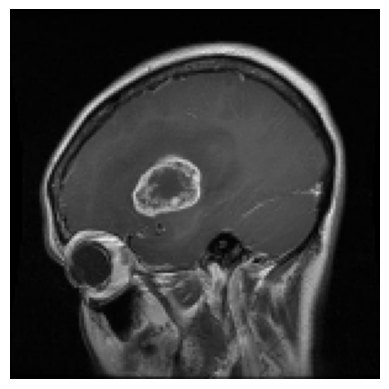

(150, 150, 3)

In [16]:
# Read and resize image
image = cv2.imread("/content/data/Training/glioma_tumor/gg (105).jpg")
image = cv2.resize(image , (150 , 150))


# Convert BGR to RGB
image_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

# Display image using matplotlib
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

image.shape

In [17]:
for index , label in enumerate(labels):
  path = os.path.join(training_data , label)
  for j in os.listdir(path):
    image_path = os.path.join(path , j)
    image = cv2.imread(image_path)
    image = cv2.resize(image , (150 , 150))
    X_train_data.append(image)
    y_train_data_label.append(index)

In [18]:
# Now for testing
for index , label in enumerate(labels):
  path = os.path.join(testing_data , label)
  for j in os.listdir(path):
    image_path = os.path.join(path , j)
    image = cv2.imread(image_path)
    image = cv2.resize(image , (150 , 150))
    X_train_data.append(image)
    y_train_data_label.append(index)

In [19]:
len(X_train_data)

3264

In [20]:
len(y_train_data_label)

3264

# **Now Shuffle**

In [21]:
X_train_data = np.array(X_train_data)
y_train_data_label = np.array(y_train_data_label)

In [22]:
X_train = []
y_train = []

In [23]:
X_train , y_train = shuffle(X_train_data , y_train_data_label , random_state=101)

In [24]:
X_train.shape

(3264, 150, 150, 3)

In [25]:
y_train.shape

(3264,)

# Now apply train_test_split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X_train , y_train , test_size=0.1 , random_state=101 , stratify=y_train)

In [28]:
print("X_train shape: " , X_train.shape)
print("X_test shape: " , X_test.shape)
print("y_train shape: " , y_train.shape)
print("y_test shape: " , y_test.shape)

X_train shape:  (2937, 150, 150, 3)
X_test shape:  (327, 150, 150, 3)
y_train shape:  (2937,)
y_test shape:  (327,)


In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [31]:
y_train_categorical

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [32]:
y_test_categorical

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

# **Now building model**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout

In [34]:
def my_model():

  model = Sequential()
  model.add(Conv2D(32 , (3,3) , activation="relu" , input_shape=(150 , 150 , 3)))
  model.add(Conv2D(64 , (3,3) , activation="relu"))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))

  model.add(Conv2D(64 , (3,3) , activation="relu"))
  model.add(Conv2D(64 , (3,3) , activation="relu"))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))

  model.add(Conv2D(128 , (3,3) , activation="relu"))
  model.add(Conv2D(128 , (3,3) , activation="relu"))
  model.add(Conv2D(128 , (3,3) , activation="relu"))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))

  model.add(Conv2D(128 , (3,3) , activation="relu"))
  model.add(Conv2D(264 , (3,3) , activation="relu"))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))

  model.add(Flatten())

  model.add(Dense(512 , activation="relu"))
  model.add(Dense(512 , activation="relu"))
  model.add(Dropout(0.3))

  model.add(Dense(4 , activation="softmax"))

  model.summary()
  model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"])

  return model

In [35]:
cnn = my_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 264)    │       304,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 264)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 264)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,379,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,558,668 (17.39 MB)

 Trainable params: 4,558,668 (17.39 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = cnn.fit(X_train , y_train_categorical , epochs=10 , validation_split=0.1)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 44s 315ms/step - accuracy: 0.2876 - loss: 1.8438 - val_accuracy: 0.5238 - val_loss: 1.1262
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.4823 - loss: 1.1499 - val_accuracy: 0.5884 - val_loss: 0.9224
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.6373 - loss: 0.8749 - val_accuracy: 0.6667 - val_loss: 0.7660
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.6969 - loss: 0.7157 - val_accuracy: 0.7347 - val_loss: 0.6339
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.7431 - loss: 0.6127 - val_accuracy: 0.7551 - val_loss: 0.6206
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.7819 - loss: 0.5269 - val_accuracy: 0.8367 - val_loss: 0.4713
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.8040 - loss: 0.4794 - val_accuracy: 0.8503 - val_loss: 0.3932
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.8235 - loss: 0.4346 - val_accuracy: 0.8503 -

In [40]:
def plot_training_history(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Loss plot
    ax1.plot(loss, label="Training Loss")
    ax1.plot(val_loss, label="Validation Loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.set_title("Training vs Validation Loss")
    ax1.legend()
    ax1.grid(True)

    # Accuracy plot
    ax2.plot(accuracy, label="Training Accuracy")
    ax2.plot(val_accuracy, label="Validation Accuracy")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title("Training vs Validation Accuracy")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

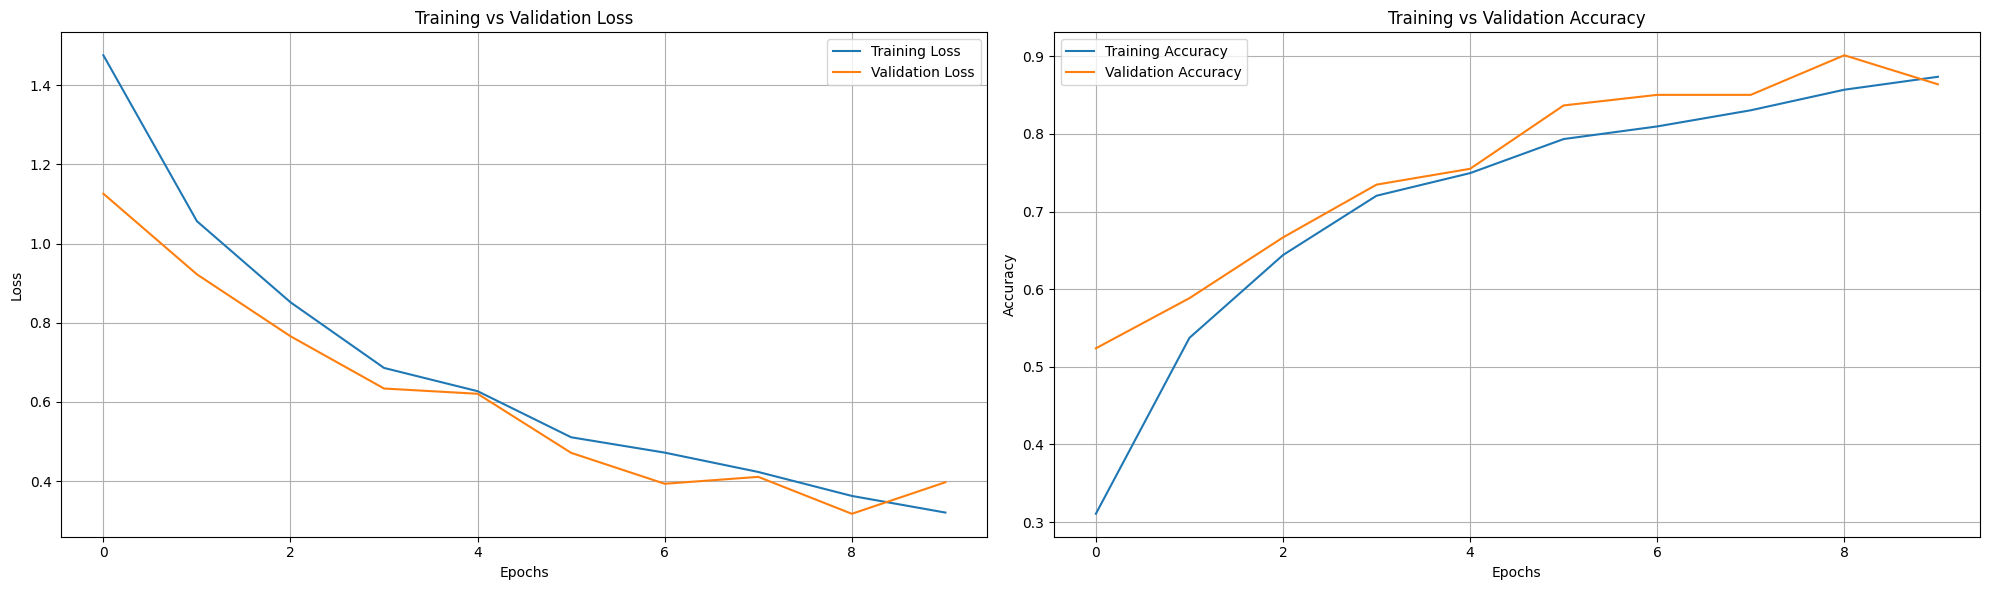

In [41]:
plot_training_history(history)

In [42]:
test_loss , test_accuracy = cnn.evaluate(X_test , y_test_categorical)

print("Test Loss: " , test_loss)
print("Test Accuracy: " , test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.8579 - loss: 0.4373
Test Loss:  0.406011700630188
Test Accuracy:  0.853210985660553


# **Confusion Matrix**

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step
Total Predictions: 327
Correct Predictions: 279
Incorrect Predictions: 48
Accuracy: 0.8532


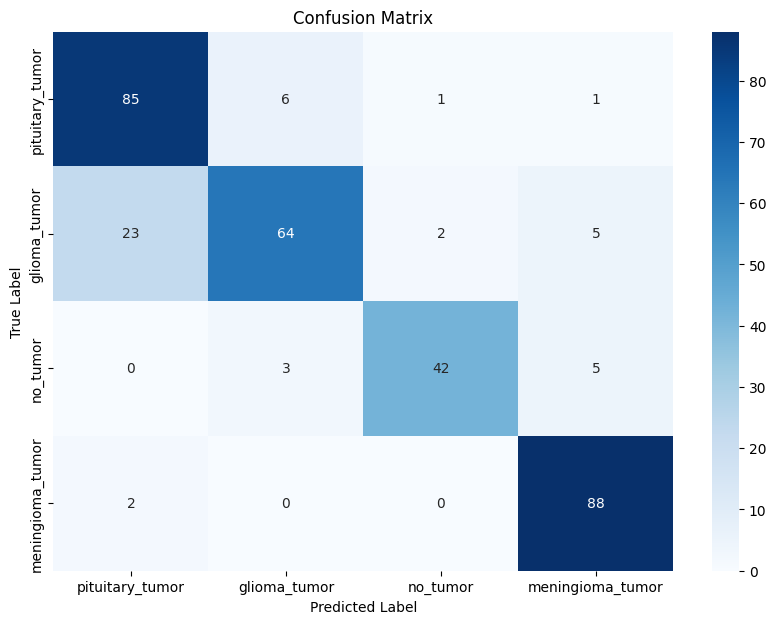

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class labels
labels = ['pituitary_tumor', 'glioma_tumor', 'no_tumor', 'meningioma_tumor']

# Step 1: Make predictions on the test data
y_pred_prob = cnn.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Convert true labels to class labels if needed
y_true = np.argmax(y_test_categorical, axis=1)

# Step 3: Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate correct and incorrect predictions
correct_predictions = np.sum(np.diag(cm))  # Sum of diagonal elements
total_predictions = np.sum(cm)  # Total number of predictions
incorrect_predictions = total_predictions - correct_predictions

# Print overall summary
print(f"Total Predictions: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")
print(f"Accuracy: {correct_predictions / total_predictions:.4f}")

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Save Model**

In [44]:
cnn.save("brain_tumor_model.h5")

In [46]:
img = cv2.imread('/content/data/Testing/meningioma_tumor/image(120).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [47]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

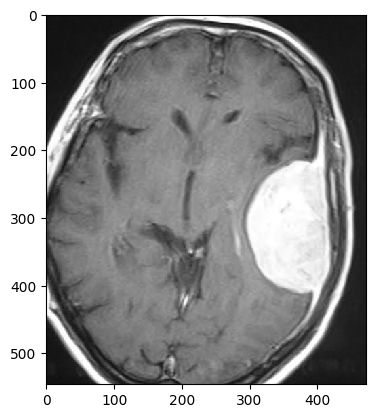

In [48]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/data/Testing/meningioma_tumor/image(120).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [49]:
a = cnn.predict(img_array)
print(a)
indices = a.argmax()
class_name = labels[indices]
print(class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.03438357 0.8732452  0.07670327 0.01566799]]
glioma_tumor


In [50]:
img = cv2.imread('/content/data/Testing/meningioma_tumor/image(26).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)

img_array = img_array.reshape(1,150,150,3)
a = cnn.predict(img_array)
print(a)
indices = a.argmax()
class_name = labels[indices]
print(class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[2.1927339e-01 7.0843661e-01 7.1933798e-02 3.5620865e-04]]
glioma_tumor
